In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('G:\Titanic-Dataset.csv')


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\chauh\AppData\Local\Temp\ipykernel_19232\1051798353.py:6: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('G:\Titanic-Dataset.csv')


In [8]:
print(df.info())          
print(df.describe())     
print(df.isnull().sum())  
print(df.head())         


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)      #for numerical values filling with mean and mode

C:\Users\chauh\AppData\Local\Temp\ipykernel_19232\4198278971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)      #for numerical values filling with mean and mode


In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  #for catagories column filling with mode or placeholder

C:\Users\chauh\AppData\Local\Temp\ipykernel_19232\2018939074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  #for catagories column filling with mode or placeholder


In [11]:
#to covert catagory features to numbers 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) 


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalize 'Age' and 'Fare'
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

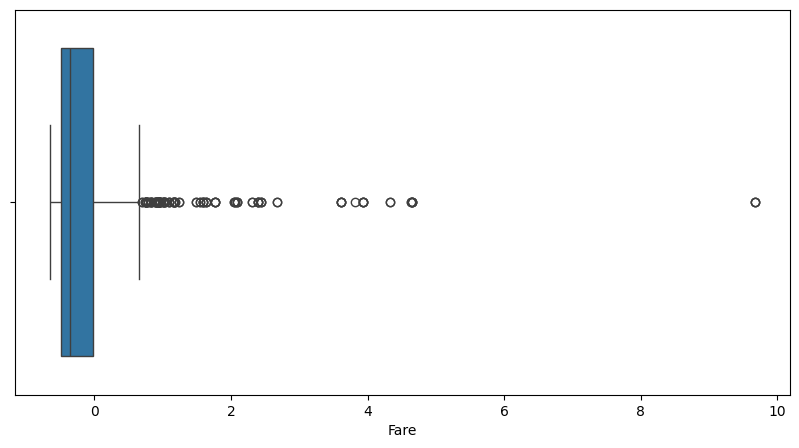

In [14]:
#Visualize Outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fare'])
plt.show()

#Remove Outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z_scores < 3).all(axis=1)]
